# 3-10 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup # 웹 데이터 가져오기
import pandas as pd

In [3]:
from urllib.request import urlopen

url_base = 'https://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20200715'

page = urlopen(url_base + url_sub)

soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20200715" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [4]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=174830" title="가버나움">가버나움</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=106360" title="위대한 쇼맨">위대한 쇼맨</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10038" title="에이리언 2">에이리언 2</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10001" title="시네마 천국">시네마 천국</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=14448" title="패왕별희 디 오리지널">패왕별희 디 오리지널</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=146504" title="우리들">우리들</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=29059" title="피아니스트의 전설">피아니스트의 전설</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=85825" title="톰보이">톰보이</a>
 </

In [6]:
soup.find_all('div','tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=174830" title="가버나움">가버나움</a>
</div>

In [7]:
soup.find_all('div','tit5')[0].a.string

'가버나움'

In [9]:
soup.find_all('td','point')

[<td class="point">9.59</td>,
 <td class="point">9.40</td>,
 <td class="point">9.34</td>,
 <td class="point">9.34</td>,
 <td class="point">9.31</td>,
 <td class="point">9.31</td>,
 <td class="point">9.31</td>,
 <td class="point">9.26</td>,
 <td class="point">9.25</td>,
 <td class="point">9.22</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.12</td>,
 <td class="point">9.04</td>,
 <td class="point">9.04</td>,
 <td class="point">9.02</td>,
 <td class="point">9.02</td>,
 <td class="point">9.02</td>,
 <td class="point">9.02</td>,
 <td class="point">8.98</td>,
 <td class="point">8.95</td>,
 <td class="point">8.94</td>,
 <td class="point">8.93</td>,
 <td class="point">8.92</td>,
 <td class="point">8.89</td>,
 <td class="point">8.86</td>,
 <td class="point">8.84</td>,
 <td class="point">8.78</td>,
 <td class="point">8.78</td>,
 <td class="point">8.76</td>,
 <td class="point">8.76</td>,
 <td class="point">8.73</td>,
 <td class="point">8.67</td>,
 <td class

In [10]:
soup.find_all('td','point')[0].string

'9.59'

In [11]:
# 영화 제목 보기
movie_name = [soup.find_all('div','tit5')[n].a.string for n in range(0,40)]
movie_name

['가버나움',
 '위대한 쇼맨',
 '에이리언 2',
 '다크 나이트',
 '시네마 천국',
 '패왕별희 디 오리지널',
 '소년시절의 너',
 '우리들',
 '피아니스트의 전설',
 '톰보이',
 '어느 가족',
 '스타 이즈 본',
 '에이리언',
 '타오르는 여인의 초상',
 '미스비헤이비어',
 '비긴 어게인',
 '다크 나이트 라이즈',
 '인생 후르츠',
 '미져리',
 '안녕, 나의 소울메이트',
 '피아노의 숲',
 '기쿠지로의 여름',
 '온워드: 단 하루의 기적',
 '미션',
 '바르다가 사랑한 얼굴들',
 '트롤: 월드 투어',
 '시티 오브 갓',
 '부에나 비스타 소셜 클럽',
 '소공녀',
 '사이비',
 '벌새',
 '현기증',
 '진짜로 일어날지도 몰라 기적',
 '베스트 오퍼',
 '걸어도 걸어도',
 '트로이',
 '라라랜드',
 '플라이',
 '찬실이는 복도 많지',
 '헤이트풀8']

In [13]:
# 영화 평점 보기
movie_point = [soup.find_all('td','point')[n].string for n in range(0,40)]
movie_point

['9.59',
 '9.40',
 '9.34',
 '9.34',
 '9.31',
 '9.31',
 '9.31',
 '9.26',
 '9.25',
 '9.22',
 '9.20',
 '9.18',
 '9.12',
 '9.04',
 '9.04',
 '9.02',
 '9.02',
 '9.02',
 '9.02',
 '8.98',
 '8.95',
 '8.94',
 '8.93',
 '8.92',
 '8.89',
 '8.86',
 '8.84',
 '8.78',
 '8.78',
 '8.76',
 '8.76',
 '8.73',
 '8.67',
 '8.65',
 '8.63',
 '8.62',
 '8.60',
 '8.60',
 '8.57',
 '8.45']

In [14]:
# 상영된 영화 날짜

date = pd.date_range('2020-4-1', periods=100, freq='D')
date

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
               '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
      

In [18]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date) :
    html = 'https://movie.naver.com/' + \
                        'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    
    response = urlopen(html.format(date=
                                  urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    
    end = len(soup.find_all('td','point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, end)])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


*) 코드에서 파란색일 때 L을 누르면 줄 번호 생성

In [19]:
len(movie_date), len(movie_name), len(movie_point)

(4994, 4994, 4994)

In [20]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2020-04-01,트루먼 쇼,9.33
1,2020-04-01,동급생,9.20
2,2020-04-01,조조 래빗,9.18
3,2020-04-01,스타 이즈 본,9.17
4,2020-04-01,바울,9.16


In [22]:
# movie 변수의 정보를 보여준다.

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4994 non-null   datetime64[ns]
 1   name    4994 non-null   object        
 2   point   4994 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 117.2+ KB


In [23]:
# 데이터의 타입 변경 : astype()
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4994 non-null   datetime64[ns]
 1   name    4994 non-null   object        
 2   point   4994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 117.2+ KB


In [24]:
import numpy as np

# 날짜가 아니라 영화별로 점수의 합산으로 데이터를 보고 싶을 때 피벗 테이블함수 사용, 내림차순으로
movie_unique = pd.pivot_table(movie, index = ['name'], aggfunc = np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
스타 이즈 본,917.33
타오르는 여인의 초상,904.17
라라랜드,860.00
찬실이는 복도 많지,829.31
벌새,770.82


In [26]:
tmp = movie.query('name == ["라라랜드"]')
tmp

,date,name,point
29,2020-04-01,라라랜드,8.6
83,2020-04-02,라라랜드,8.6
133,2020-04-03,라라랜드,8.6
183,2020-04-04,라라랜드,8.6
235,2020-04-05,라라랜드,8.6
...,...,...,...
4789,2020-07-05,라라랜드,8.6
4839,2020-07-06,라라랜드,8.6
4888,2020-07-07,라라랜드,8.6
4937,2020-07-08,라라랜드,8.6


No handles with labels found to put in legend.


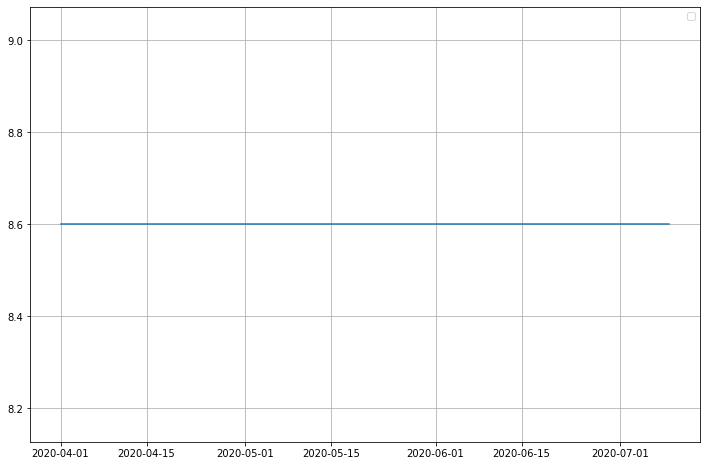

In [27]:
# 라라랜드 그래프 : 노잼...

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [28]:
tmp2 = movie.query('name == ["소리꾼"]')
tmp2

,date,name,point
4673,2020-07-03,소리꾼,8.87
4727,2020-07-04,소리꾼,8.82
4785,2020-07-05,소리꾼,8.65
4843,2020-07-06,소리꾼,8.57
4893,2020-07-07,소리꾼,8.50
4943,2020-07-08,소리꾼,8.43
4989,2020-07-09,소리꾼,8.45


No handles with labels found to put in legend.


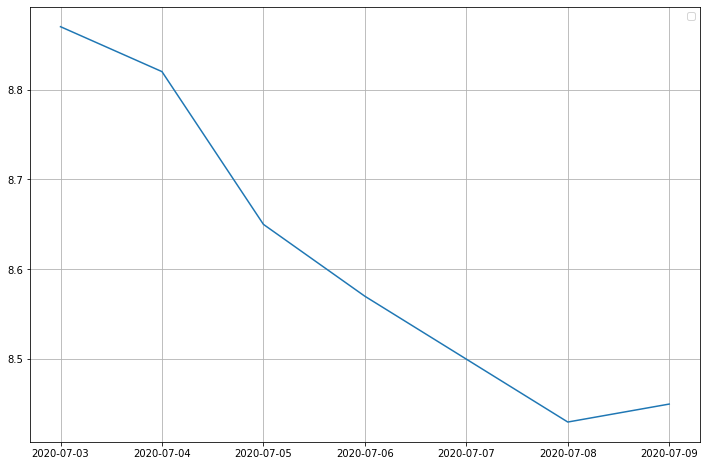

In [29]:
# 소리꾼 그래프 : 노잼...

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp2['date'], tmp2['point'])
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [30]:
movie_best.head(10)

,point
name,
스타 이즈 본,917.33
타오르는 여인의 초상,904.17
라라랜드,860.00
찬실이는 복도 많지,829.31
벌새,770.82
1917,728.52
작은 아씨들,686.92
윤희에게,670.69
아비정전,600.86


## 3-11 영화별 날짜 변화에 따른 평점 변화 확인하기

In [31]:
# 날짜 변화에 따른 평점

movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                                              \
name        1917 500일의 썸머 5일의 마중 7번방의 선물 가버나움 가장 따뜻한 색, 블루 개를 훔치는 완벽한 방법  거인   
date                                                                           
2020-04-01  8.94     8.41    NaN     NaN  NaN          NaN           NaN NaN   
2020-04-02  8.93     8.41    NaN     NaN  NaN         8.76           NaN NaN   
2020-04-03  8.93     8.41    NaN     NaN  NaN         8.76           NaN NaN   
2020-04-04  8.93     8.41    NaN     NaN  NaN         8.76           NaN NaN   
2020-04-05  8.93     8.41    NaN     NaN  NaN         8.76           NaN NaN   

                        ...                                           \
name       걷기왕 걸어도 걸어도  ... 피아니스트 세이모어의 뉴욕 소네트 피아니스트의 전설 하이큐!! 끝과 시작   
date                    ...                                            
2020-04-01 NaN     NaN  ...                NaN       NaN         NaN   
2020-04-02 NaN     NaN  ...                NaN       NaN         NaN   
2020-04-03 NaN     NaN  ...                NaN       NaN         NaN   
2020-04-04 NaN     NaN  ...                NaN       NaN         NaN   
2020-04-05 NaN     NaN  ...                NaN       NaN         NaN   

                                                                                
name       하이큐!! 승자와 패자 하이큐!! 재능과 센스 행복 목욕탕 현기증 호텔 레이크 흑집사 : 북 오브 더 아틀란틱    히트  
date                                                                            
2020-04-01          NaN          NaN    NaN NaN    NaN              9.15  9.09  
2020-04-02          NaN          NaN    NaN NaN    NaN              9.15  9.09  
2020-04-03          NaN          NaN    NaN NaN    NaN              9.15  9.09  
2020-04-04          NaN          NaN    NaN NaN    NaN              9.15  9.09  
2020-04-05          NaN          NaN    NaN NaN    NaN              9.15  9.09  

[5 rows x 235 columns]

In [32]:
# 필요 없는 것을 지우라는 건데 지금 데이터에선 큰 변호 없음
movie_pivot.columns = movie_pivot.columns.droplevel()

In [33]:
movie_pivot.head()

name,1917,500일의 썸머,5일의 마중,7번방의 선물,가버나움,"가장 따뜻한 색, 블루",개를 훔치는 완벽한 방법,거인,걷기왕,걸어도 걸어도,...,피아니스트 세이모어의 뉴욕 소네트,피아니스트의 전설,하이큐!! 끝과 시작,하이큐!! 승자와 패자,하이큐!! 재능과 센스,행복 목욕탕,현기증,호텔 레이크,흑집사 : 북 오브 더 아틀란틱,히트
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,8.94,8.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,9.09
2020-04-02,8.93,8.41,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,9.09
2020-04-03,8.93,8.41,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,9.09
2020-04-04,8.93,8.41,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,9.09
2020-04-05,8.93,8.41,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,9.09


In [34]:
import platform
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin' :
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else :
    print('Unknown system... sorry~~~~')

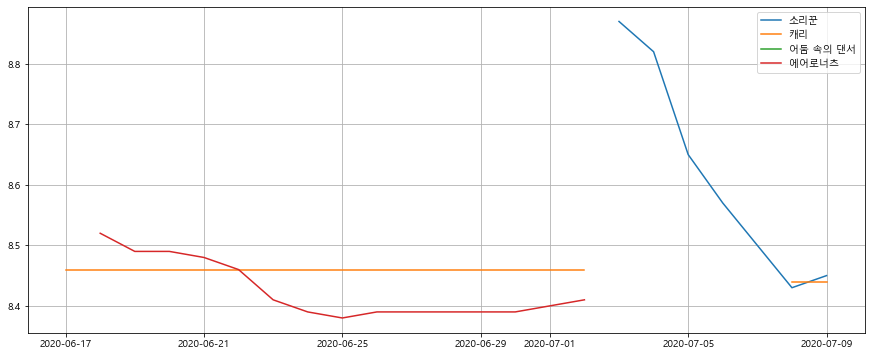

In [36]:
target_col = ['소리꾼','캐리','어둠 속의 댄서','에어로너츠']
plt.figure(figsize=(15,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc = 'best')
plt.grid()
plt.show()